# Classification

## Team Name
>### Sigma  

## Team Member
>### 조현윤, 이상협, 정하연  

## Objective
> ### in search of better methods of using this behavioral data to predict which individuals they should approach—and even when and how to approach them.
> ### to create a classification algorithm that accurately identifies which customers have the most potential business value for Red Hat based on their characteristics and activities.
> ### to predict the potential business value of a person who has performed a specific activity.

## Evaluation
> ### valuated on area under the ROC curve between the predicted and the observed outcome.

## Submission File
> ### For each activity_id in the test set, you must predict a probability for the 'outcome' variable, represented by a number between 0 and 1.
~~~~
activity_id,outcome
act1_1,0
act1_100006,0
act1_100050,0
~~~~

## Reference 
[kaggel Predicting Red Hat Business Value](https://www.kaggle.com/c/predicting-red-hat-business-value)

## Load Data Set

In [1]:
import pandas as pd
# activity data set
act_Train = pd.read_csv('./data/act_train.csv')
act_Test = pd.read_csv('./data/act_test.csv')
# people data set
people = pd.read_csv('./data/people.csv')

## Data
> #### uses two separate data files that may be joined together to create a single, unified data table.
> #### a people file and an activity file.

In [2]:
pd.set_option('display.max_columns', 60)

### People file
> #### all of the unique people (and the corresponding characteristics) that have performed activities over time.
> #### Each row in the people file represents a unique person.
> #### Each person has a unique people_id.

In [3]:
for column in people.columns:
    print ('featue : {}, type : {}'.format(column,people[column].dtype))

featue : people_id, type : object
featue : char_1, type : object
featue : group_1, type : object
featue : char_2, type : object
featue : date, type : object
featue : char_3, type : object
featue : char_4, type : object
featue : char_5, type : object
featue : char_6, type : object
featue : char_7, type : object
featue : char_8, type : object
featue : char_9, type : object
featue : char_10, type : bool
featue : char_11, type : bool
featue : char_12, type : bool
featue : char_13, type : bool
featue : char_14, type : bool
featue : char_15, type : bool
featue : char_16, type : bool
featue : char_17, type : bool
featue : char_18, type : bool
featue : char_19, type : bool
featue : char_20, type : bool
featue : char_21, type : bool
featue : char_22, type : bool
featue : char_23, type : bool
featue : char_24, type : bool
featue : char_25, type : bool
featue : char_26, type : bool
featue : char_27, type : bool
featue : char_28, type : bool
featue : char_29, type : bool
featue : char_30, type : b

people_id : identical  
group_1 : group *  
date : datetime  
char_1 ~ char_9 : type *  
char_10 ~ char_37 : True or False  
char_38 : integer  

In [4]:
people.head()

,people_id,char_1,group_1,char_2,date,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10,char_11,char_12,char_13,char_14,char_15,char_16,char_17,char_18,char_19,char_20,char_21,char_22,char_23,char_24,char_25,char_26,char_27,char_28,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38
0,ppl_100,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,type 2,type 2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,36
1,ppl_100002,type 2,group 8688,type 3,2021-01-06,type 28,type 9,type 5,type 3,type 11,type 2,type 4,False,False,True,True,False,False,False,True,False,False,False,False,False,True,False,True,True,True,False,False,True,True,True,True,True,True,True,False,76
2,ppl_100003,type 2,group 33592,type 3,2022-06-10,type 4,type 8,type 5,type 2,type 5,type 2,type 2,True,True,True,True,True,True,False,True,False,True,False,True,True,True,True,True,True,True,True,False,False,True,True,True,True,False,True,True,99
3,ppl_100004,type 2,group 22593,type 3,2022-07-20,type 40,type 25,type 9,type 4,type 16,type 2,type 2,True,True,True,True,True,False,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,76
4,ppl_100006,type 2,group 6534,type 3,2022-07-27,type 40,type 25,type 9,type 3,type 8,type 2,type 2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,84


In [5]:
len(people)

189118

### activity file

> #### the unique activities (and the corresponding activity characteristics) that each person has performed over time.
> #### Each row in the activity file represents a unique activity performed by a person on a certain date.
> #### Each activity has a unique activity_id.
> #### The activity file contains several different categories of activities.    
>> ##### Type 1 activities are different from type 2-7 activities because there are more known characteristics associated with type 1 activities (nine in total) than type 2-7 activities (which have only one associated characteristic).
> ####  All variables are categorical, with the exception of 'char_38' in the people file, which is a continuous numerical variable.

### act_Train

In [6]:
for column in act_Train.columns:
    print ('featue : {}, type : {}'.format(column,act_Train[column].dtype))

featue : people_id, type : object
featue : activity_id, type : object
featue : date, type : object
featue : activity_category, type : object
featue : char_1, type : object
featue : char_2, type : object
featue : char_3, type : object
featue : char_4, type : object
featue : char_5, type : object
featue : char_6, type : object
featue : char_7, type : object
featue : char_8, type : object
featue : char_9, type : object
featue : char_10, type : object
featue : outcome, type : int64


In [7]:
act_Train.head()

,people_id,activity_id,date,activity_category,char_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10,outcome
0,ppl_100,act2_1734928,2023-08-26,type 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 76,0
1,ppl_100,act2_2434093,2022-09-27,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
2,ppl_100,act2_3404049,2022-09-27,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
3,ppl_100,act2_3651215,2023-08-04,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
4,ppl_100,act2_4109017,2023-08-26,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0


### act_Test

In [8]:
for column in act_Test.columns:
    print ('featue : {}, type : {}'.format(column,act_Test[column].dtype))

featue : people_id, type : object
featue : activity_id, type : object
featue : date, type : object
featue : activity_category, type : object
featue : char_1, type : object
featue : char_2, type : object
featue : char_3, type : object
featue : char_4, type : object
featue : char_5, type : object
featue : char_6, type : object
featue : char_7, type : object
featue : char_8, type : object
featue : char_9, type : object
featue : char_10, type : object


In [9]:
act_Test.head()

,people_id,activity_id,date,activity_category,char_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10
0,ppl_100004,act1_249281,2022-07-20,type 1,type 5,type 10,type 5,type 1,type 6,type 1,type 1,type 7,type 4,NaN
1,ppl_100004,act2_230855,2022-07-20,type 5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 682
2,ppl_10001,act1_240724,2022-10-14,type 1,type 12,type 1,type 5,type 4,type 6,type 1,type 1,type 13,type 10,NaN
3,ppl_10001,act1_83552,2022-11-27,type 1,type 20,type 10,type 5,type 4,type 6,type 1,type 1,type 5,type 5,NaN
4,ppl_10001,act2_1043301,2022-10-15,type 5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 3015


> #### To develop a predictive model with this data, you will likely need to join the files together into a single data set.
> #### The two files can be joined together using person_id as the common key.

### Load Python Package

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from datetime import datetime
from datetime import date
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.stats.stattools as stools
import scipy as sp
%matplotlib inline

In [91]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from scipy.stats import chisquare
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import *
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost
from sklearn.decomposition import PCA
import io
import pydot
from IPython.core.display import Image 
from sklearn.tree import export_graphviz

In [13]:
# import numpy as np
def ResetDataFrame(df, checkList):
    for feature in df.columns:
        if feature not in checkList:
            if df[feature].dtype == 'object':
                df[feature].fillna ('type 0', inplace = True)
                df[feature] = df[feature].apply(lambda x:x.split(' ')[1]).astype(np.int32)
            elif df[feature].dtype == 'bool':
                df[feature] = df[feature].astype(np.int8)
    return df

In [14]:
def SetTime(df, timeFeature):
    df[timeFeature] = pd.to_datetime(df[timeFeature])
    df['year'] = df[timeFeature].dt.year
    df['month'] = df[timeFeature].dt.month
    df['day'] = df[timeFeature].dt.day
    df['weekday'] = df[timeFeature].dt.weekday
    df['weekend'] = ((df.weekday == 0) | (df.weekday == 6)).astype(int)
    return df

## Exploratory Data Analysis (EDA )¶

#### people id in act_train data set

In [15]:
len(act_Train)

2197291

In [16]:
print('Number of active people: {}'.format(act_Train['people_id'].nunique()))

Number of active people: 151295


/Users/hyunyoun/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


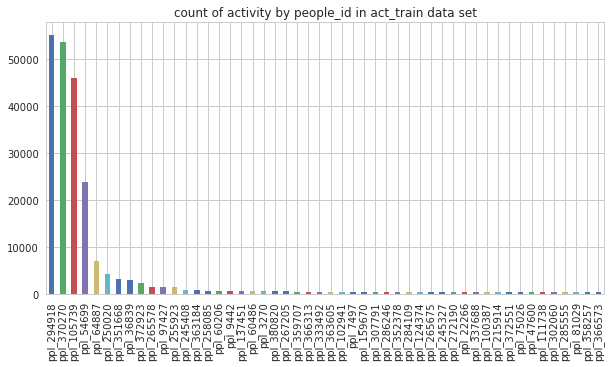

In [17]:
plt.figure(figsize=(10,5))
act_Train['people_id'].value_counts()[:50].plot(kind = 'bar',title = 'count of activity by people_id in act_train data set')

#### people id in act_test data set

In [18]:
len(act_Test)

498687

In [19]:
print('Number of active people: {}'.format(act_Test['people_id'].nunique()))

Number of active people: 37823


/Users/hyunyoun/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


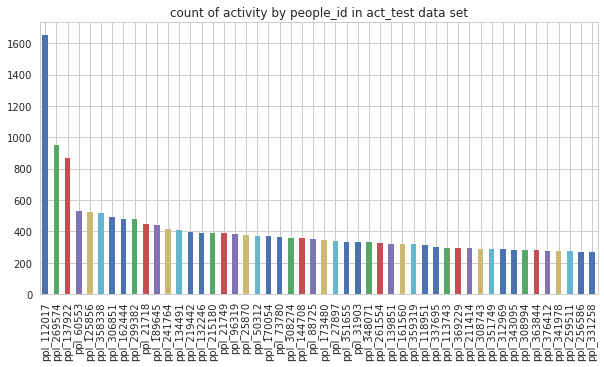

In [20]:
plt.figure(figsize=(10,5))
act_Test['people_id'].value_counts()[:50].plot(kind = 'bar',title = 'count of activity by people_id in act_test data set')

### Split people data set wether train data set or test data set

In [21]:
idx_train =list(act_Train['people_id'].value_counts().index)
idx_test =list(act_Test['people_id'].value_counts().index)

In [22]:
train_people = people.loc[people['people_id'].isin(idx_train)]
test_people = people.loc[people['people_id'].isin(idx_test)]

In [23]:
train_people.to_csv('./data/act_train_people.csv',index=False)
test_people.to_csv('./data/act_test_people.csv',index=False)

### group by people_id & outcome in act_train dataset

In [24]:
dfx = act_Train.groupby(['people_id','outcome']).size().unstack()
dfx = dfx.fillna(0).astype(int)

In [25]:
only_1 = dfx[(dfx[0]==0) & (dfx[1]!=0)]
only_0 = dfx[(dfx[0]!=0) & (dfx[1]==0)]
mix__0or1 = dfx[(dfx[0]!=0) & (dfx[1]!=0)]
totalCount = len(only_1.index) + len(only_0.index) + len(mix__0or1)

In [26]:
only1 = len(only_1.index)/totalCount
only0 = len(only_0.index)/totalCount
mix = len(mix__0or1)/totalCount

In [27]:
print ('only 1 : {0}, people probability : {1:0.4f}'.format(len(only_1.index), only1))
print ('only 0 : {0} , people probability : {1:0.4f}'.format(len(only_0.index), only0))
print ('0 or 1 : {0}, , people probability : {1:0.4f}'.format(len(mix__0or1), mix))

only 1 : 62115, people probability : 0.4106
only 0 : 82524 , people probability : 0.5455
0 or 1 : 6656, , people probability : 0.0440


In [28]:
train_people = pd.merge(train_people, dfx, left_on = 'people_id',right_index = True)

In [29]:
train_people.rename(columns={0:'outcome_0',1:'outcome_1'}, inplace = True)

In [30]:
def ax(x):
    if x['outcome_0'] !=0 and x['outcome_1'] ==0:
        return 0
    elif x['outcome_0'] ==0 and x['outcome_1'] !=0:
        return 1
    else:
        return 2

In [31]:
train_people['result'] = train_people.apply(ax, axis = 1)

In [32]:
x = train_people[['people_id','outcome_0','outcome_1']]
x.set_index('people_id', inplace = True)
x = x.loc[idx_train]

/Users/hyunyoun/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


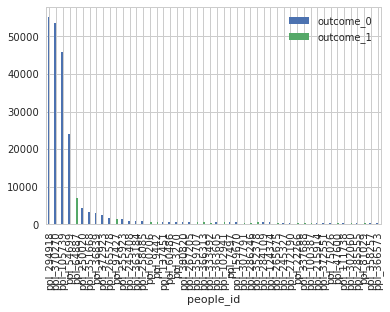

In [33]:
plt.figure(figsize=(15,5))
x[:50].plot(kind = 'bar')

In [34]:
train_people.drop(['outcome_0','outcome_1'],inplace = True, axis = 1)

/Users/hyunyoun/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


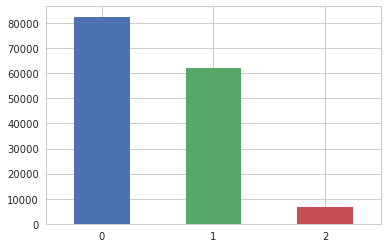

In [35]:
train_people['result'].value_counts().plot(kind = 'bar',rot = 0)

In [36]:
peopleCheckList = ['people_id','date','result']

In [37]:
train_people = ResetDataFrame(train_people, peopleCheckList)
train_people = SetTime(train_people,'date')
train_people.drop('date',axis = 1,inplace = True)

In [38]:
train_people.head()

,people_id,char_1,group_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10,char_11,char_12,char_13,char_14,char_15,char_16,char_17,char_18,char_19,char_20,char_21,char_22,char_23,char_24,char_25,char_26,char_27,char_28,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38,result,year,month,day,weekday,weekend
0,ppl_100,2,17304,2,5,5,5,3,11,2,2,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,36,0,2021,6,29,1,0
1,ppl_100002,2,8688,3,28,9,5,3,11,2,4,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,1,1,1,0,0,1,1,1,1,1,1,1,0,76,1,2021,1,6,2,0
2,ppl_100003,2,33592,3,4,8,5,2,5,2,2,1,1,1,1,1,1,0,1,0,1,0,1,1,1,1,1,1,1,1,0,0,1,1,1,1,0,1,1,99,1,2022,6,10,4,0
4,ppl_100006,2,6534,3,40,25,9,3,8,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,84,1,2022,7,27,2,0
7,ppl_100013,2,4204,3,4,8,4,1,7,2,3,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,0,0,1,1,1,1,0,1,1,91,1,2023,1,24,1,0


### Train data

In [48]:
list1 = ['people_id','activity_id','date', 'outcome']
act_Train = ResetDataFrame(act_Train, list1)
act_Train = SetTime(act_Train,'date')
act_Train.drop('date',axis = 1,inplace = True)

In [49]:
people.head()

,people_id,char_1,group_1,char_2,date,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10,char_11,char_12,char_13,char_14,char_15,char_16,char_17,char_18,char_19,char_20,char_21,char_22,char_23,char_24,char_25,char_26,char_27,char_28,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38
0,ppl_100,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,type 2,type 2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,36
1,ppl_100002,type 2,group 8688,type 3,2021-01-06,type 28,type 9,type 5,type 3,type 11,type 2,type 4,False,False,True,True,False,False,False,True,False,False,False,False,False,True,False,True,True,True,False,False,True,True,True,True,True,True,True,False,76
2,ppl_100003,type 2,group 33592,type 3,2022-06-10,type 4,type 8,type 5,type 2,type 5,type 2,type 2,True,True,True,True,True,True,False,True,False,True,False,True,True,True,True,True,True,True,True,False,False,True,True,True,True,False,True,True,99
3,ppl_100004,type 2,group 22593,type 3,2022-07-20,type 40,type 25,type 9,type 4,type 16,type 2,type 2,True,True,True,True,True,False,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,76
4,ppl_100006,type 2,group 6534,type 3,2022-07-27,type 40,type 25,type 9,type 3,type 8,type 2,type 2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,84


In [50]:
list1 = ['people_id','date','char_38']
people = ResetDataFrame(people, list1)
people = SetTime(people,'date')
people.drop('date',axis = 1,inplace = True)

In [51]:
trainMerge = pd.merge(act_Train,people, on='people_id')
trainMerge.tail()

,people_id,activity_id,activity_category,char_1_x,char_2_x,char_3_x,char_4_x,char_5_x,char_6_x,char_7_x,char_8_x,char_9_x,char_10_x,outcome,year_x,month_x,day_x,weekday_x,weekend_x,char_1_y,group_1,char_2_y,char_3_y,char_4_y,char_5_y,char_6_y,char_7_y,char_8_y,char_9_y,char_10_y,...,char_14,char_15,char_16,char_17,char_18,char_19,char_20,char_21,char_22,char_23,char_24,char_25,char_26,char_27,char_28,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38,year_y,month_y,day_y,weekday_y,weekend_y
2197286,ppl_99994,act2_4668076,4,0,0,0,0,0,0,0,0,0,418,1,2023,6,16,4,0,2,17764,3,2,7,2,1,2,2,2,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,95,2023,1,6,4,0
2197287,ppl_99994,act2_4743548,4,0,0,0,0,0,0,0,0,0,1832,1,2023,3,30,3,0,2,17764,3,2,7,2,1,2,2,2,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,95,2023,1,6,4,0
2197288,ppl_99994,act2_536973,2,0,0,0,0,0,0,0,0,0,1,1,2023,1,19,3,0,2,17764,3,2,7,2,1,2,2,2,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,95,2023,1,6,4,0
2197289,ppl_99994,act2_688656,4,0,0,0,0,0,0,0,0,0,199,1,2023,5,2,1,0,2,17764,3,2,7,2,1,2,2,2,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,95,2023,1,6,4,0
2197290,ppl_99994,act2_715089,2,0,0,0,0,0,0,0,0,0,1,1,2023,6,15,3,0,2,17764,3,2,7,2,1,2,2,2,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,95,2023,1,6,4,0


In [52]:
trainMerge.to_csv('./data/train_merge.csv',index=False)

In [53]:
mergeX = trainMerge.drop(['people_id','activity_id','outcome'],axis = 1)
mergey = trainMerge['outcome']

### Test data

In [54]:
list1 = ['people_id','activity_id','date', 'outcome']
act_Test = ResetDataFrame(act_Test, list1)
act_Test = SetTime(act_Test,'date')
act_Test.drop('date',axis = 1,inplace = True)

In [55]:
testMerge = pd.merge(act_Test,people, on='people_id')
testMerge.tail()

,people_id,activity_id,activity_category,char_1_x,char_2_x,char_3_x,char_4_x,char_5_x,char_6_x,char_7_x,char_8_x,char_9_x,char_10_x,year_x,month_x,day_x,weekday_x,weekend_x,char_1_y,group_1,char_2_y,char_3_y,char_4_y,char_5_y,char_6_y,char_7_y,char_8_y,char_9_y,char_10_y,char_11,...,char_14,char_15,char_16,char_17,char_18,char_19,char_20,char_21,char_22,char_23,char_24,char_25,char_26,char_27,char_28,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38,year_y,month_y,day_y,weekday_y,weekend_y
498682,ppl_99997,act2_4367092,2,0,0,0,0,0,0,0,0,0,1,2023,4,22,5,0,2,17304,2,40,25,9,3,8,6,6,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36,2022,3,12,5,0
498683,ppl_99997,act2_4404220,2,0,0,0,0,0,0,0,0,0,1,2022,11,12,5,0,2,17304,2,40,25,9,3,8,6,6,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36,2022,3,12,5,0
498684,ppl_99997,act2_448830,2,0,0,0,0,0,0,0,0,0,1,2022,8,2,1,0,2,17304,2,40,25,9,3,8,6,6,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36,2022,3,12,5,0
498685,ppl_99997,act2_450133,2,0,0,0,0,0,0,0,0,0,1,2022,8,2,1,0,2,17304,2,40,25,9,3,8,6,6,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36,2022,3,12,5,0
498686,ppl_99997,act2_847967,2,0,0,0,0,0,0,0,0,0,1,2022,10,15,5,0,2,17304,2,40,25,9,3,8,6,6,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36,2022,3,12,5,0


In [56]:
testMerge.to_csv('./data/test_merge.csv',index=False)

In [57]:
act_id = testMerge['activity_id']
testMergeX = testMerge.drop(['people_id','activity_id'],axis = 1)

### Classification

In [85]:
lomodel = LogisticRegression(random_state=5).fit(mergeX, mergey)

In [86]:
accuracy_score(lomodel.predict(mergeX),mergey)

0.82515424675202331

In [87]:
bagmodel = BaggingClassifier(LogisticRegression(), bootstrap_features=True, random_state=0).fit(mergeX, mergey)


In [88]:
accuracy_score(bagmodel.predict(mergeX), mergey)

0.82071241360384217

### Neural Network

In [ ]:
x_Trainm, x_Testm, y_trainm, y_testm = train_test_split(mergeX, 
                                                   mergey, test_size = 0.2, random_state = 1)

In [ ]:
y_trainm0 = np_utils.to_categorical(y_trainm,2)
y_testm0 = np_utils.to_categorical(y_testm, 2)

In [ ]:
print (x_Trainm.shape)
print (x_Testm.shape)

In [ ]:
from keras.layers import Dropout

In [ ]:
np.random.seed(0)

modelm = Sequential()
modelm.add(Dense(500, input_dim=60, activation="sigmoid",kernel_initializer="glorot_uniform", kernel_regularizer=regularizers.l2(0.02)))
modelm.add(Dropout(0.4))
modelm.add(Dense(100, activation="relu"))
modelm.add(Dropout(0.4))
modelm.add(Dense(2, activation="softmax"))
#model.add(Dense(2, activation="relu"))
#model.add(Dropout(0.2))
#model.add(Dense(2, activation="softmax"))
#model.compile(optimizer=SGD(lr=3), loss='mean_squared_error', metrics=["accuracy"])
modelm.compile(optimizer='adadelta', loss='categorical_crossentropy', metrics=["accuracy"])


SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [ ]:
histm = modelm.fit(x_Trainm.values, y_trainm0, 
                 epochs=500, batch_size=700000, 
                 validation_data=(x_Testm.values, y_testm0), 
                 verbose=2)

In [ ]:
plt.plot(histm.history['loss'])
plt.show()

In [ ]:
plt.plot(histm.history['acc'], 'b-', label="training")
plt.plot(histm.history['val_acc'], 'r:', label="test")
plt.legend()
plt.show()

In [ ]:
x = modelm.predict_classes(testMergeX.values)

In [ ]:
x2 = pd.concat([act_id,pd.DataFrame(x)],axis = 1)
x2.rename({0:'outcome'},inplace = True,axis = 1)

In [ ]:
x2.to_csv('./submission_svg.csv',index = False)

### XGBOOST

In [124]:
max_depth = 5
subsample = 0.8
colsample_bytree= 0.8
params ={
        "objective": "binary:logistic",
        "booster" : "gbtree",
        "eval_metric": "auc",
        "max_depth" : max_depth,
        "subsample": subsample,
        "colsample_bytree": colsample_bytree,
        "silent":1,
    'eta':0.1
    
    }
num_boost_round = 250
early_stopping_rounds = 10
test_size = 0.25

In [ ]:
X_train, X_valid = train_test_split(trainMerge, test_size=test_size)
y_train = X_train['outcome']
y_valid = X_valid['outcome']
X_train = X_train.drop(['people_id','activity_id','outcome'],axis = 1)
X_valid = X_valid.drop(['people_id','activity_id','outcome'], axis = 1)
dtrain = xgboost.DMatrix(X_train, y_train)
dvalid = xgboost.DMatrix(X_valid, y_valid)
watchlist = [(dtrain, 'train'), (dvalid, 'eval')]
gbm = xgboost.train(params, dtrain, num_boost_round, evals=watchlist, early_stopping_rounds=early_stopping_rounds, verbose_eval=True)
check = gbm.predict(xgboost.DMatrix(X_valid))
score = roc_auc_score(y_valid, check)
print (score)
testActivityId = testMerge['activity_id']
test = testMerge.drop(['people_id','activity_id'],axis = 1)
test_prediction = gbm.predict(xgb.DMatrix(test))
out = pd.concat([testActivityId,pd.DataFrame(test_prediction.round())],axis = 1)
out.rename({0:'outcome'},axis = 1,inplace = True)
out.to_csv('./ours.csv',index = False)

[0]	train-auc:0.942786	eval-auc:0.942733
Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eval-auc hasn't improved in 10 rounds.
[1]	train-auc:0.95101	eval-auc:0.950861
[2]	train-auc:0.954466	eval-auc:0.954139
[3]	train-auc:0.959012	eval-auc:0.958573
[4]	train-auc:0.961571	eval-auc:0.961186
[5]	train-auc:0.965171	eval-auc:0.964682
[6]	train-auc:0.966754	eval-auc:0.966214
[7]	train-auc:0.969683	eval-auc:0.969111
[8]	train-auc:0.971231	eval-auc:0.97065
[9]	train-auc:0.97246	eval-auc:0.971899
[10]	train-auc:0.973748	eval-auc:0.973182
[11]	train-auc:0.975117	eval-auc:0.974533
[12]	train-auc:0.975793	eval-auc:0.975214
[13]	train-auc:0.976929	eval-auc:0.976304
[14]	train-auc:0.977869	eval-auc:0.977206
[15]	train-auc:0.97838	eval-auc:0.977682
[16]	train-auc:0.979011	eval-auc:0.978282
[17]	train-auc:0.979262	eval-auc:0.978513
[18]	train-auc:0.979687	eval-auc:0.978926
[19]	train-auc:0.980754	eval-auc:0.979938
[20]	train-auc:0.98199	eval-auc:0

In [ ]:
xgboost.plot_importance(gbm.get_fscore())

In [ ]:
xgboost.plot_tree(gbm)

In [96]:
train_columns = trainMerge.columns.values
test_columns = testMerge.columns.values
features = list(set(train_columns) & set(test_columns))

In [97]:
categorical=['group_1','activity_category',
             'char_1_x','char_2_x','char_3_x',
             'char_4_x','char_5_x','char_6_x',
             'char_7_x','char_8_x','char_9_x',
             'char_2_y','char_3_y','char_4_y',
             'char_5_y','char_6_y','char_7_y',
             'char_8_y','char_9_y']
not_categorical=[]
for category in mergeX.columns:
    if category not in categorical:
        not_categorical.append(category)

In [100]:
enc = OneHotEncoder(handle_unknown='ignore')
enc = enc.fit(pd.concat([mergeX[categorical],testMergeX[categorical]]))

In [101]:
mergeX_cat_sparse=enc.transform(mergeX[categorical])
testMergeX_cat_sparse=enc.transform(testMergeX[categorical])

In [103]:
from scipy.sparse import hstack
mergeX_sparse=hstack((mergeX[not_categorical], mergeX_cat_sparse))
testMergeX_sparse=hstack((testMergeX[not_categorical], testMergeX_cat_sparse))

In [104]:
print("Training data: " + format(mergeX_sparse.shape))
print("Test data: " + format(testMergeX_sparse.shape))
print("###########")
print("One Hot enconded Test Dataset Script")

Training data: (2197291, 34568)
Test data: (498687, 34568)
###########
One Hot enconded Test Dataset Script


In [106]:
dtrain = xgboost.DMatrix(mergeX_sparse,label=mergey)
dtest = xgboost.DMatrix(testMergeX_sparse)

In [115]:
param = {'max_depth':10, 'eta':0.02, 'silent':1, 'objective':'binary:logistic' }
param['nthread'] = 4
param['eval_metric'] = 'auc'
param['subsample'] = 0.7
param['colsample_bytree']= 0.7
param['min_child_weight'] = 0
param['booster'] = "gblinear"

In [117]:
watchlist  = [(dtrain,'train')]
num_round = 300
early_stopping_rounds=10
bst = xgboost.train(param, dtrain, num_round, watchlist,early_stopping_rounds=early_stopping_rounds)
ypred = bst.predict(dtest)

[0]	train-auc:0.888139
Will train until train-auc hasn't improved in 10 rounds.
[1]	train-auc:0.895478
[2]	train-auc:0.903165
[3]	train-auc:0.911236
[4]	train-auc:0.919361
[5]	train-auc:0.927229
[6]	train-auc:0.934577
[7]	train-auc:0.941375
[8]	train-auc:0.947698
[9]	train-auc:0.953583
[10]	train-auc:0.959007
[11]	train-auc:0.963928
[12]	train-auc:0.96831
[13]	train-auc:0.97214
[14]	train-auc:0.975435
[15]	train-auc:0.978236
[16]	train-auc:0.980597
[17]	train-auc:0.982578
[18]	train-auc:0.984234
[19]	train-auc:0.985615
[20]	train-auc:0.986769
[21]	train-auc:0.987741
[22]	train-auc:0.988564
[23]	train-auc:0.98927
[24]	train-auc:0.989882
[25]	train-auc:0.990419
[26]	train-auc:0.990894
[27]	train-auc:0.991319
[28]	train-auc:0.991701
[29]	train-auc:0.992047
[30]	train-auc:0.992363
[31]	train-auc:0.992651
[32]	train-auc:0.992916
[33]	train-auc:0.993159
[34]	train-auc:0.993384
[35]	train-auc:0.993591
[36]	train-auc:0.993783
[37]	train-auc:0.993962
[38]	train-auc:0.994129
[39]	train-auc:0.994

NameError: name 'test' is not defined

In [123]:
output = pd.DataFrame({ 'activity_id' : testMerge['activity_id'], 'outcome': ypred })
output.head()
output.to_csv('without_leak.csv', index = False)

### Benchmark

In [111]:
import pandas as pd
import numpy as np

def simple_load():

    # Read in the data
    people = pd.read_csv("./data/people.csv")
    train = pd.read_csv("./data/act_train.csv")
    test = pd.read_csv("./data/act_test.csv")

    # Merge people to the other data sets
    train = train.merge(people, on="people_id", suffixes=("_act", ""))
    test = test.merge(people, on="people_id", suffixes=("_act", ""))

    # Set index to activity id
    train = train.set_index("activity_id")
    test = test.set_index("activity_id")

    # Correct some data types
    for field in ["date_act", "date"]:
        train[field] = pd.to_datetime(train[field])
        test[field] = pd.to_datetime(test[field])

    return train, test


def group_decision(train, test, only_certain=True):
    # Exploit the leak revealed by Loiso and team to try and directly infer any labels that can be inferred
    # https://www.kaggle.com/c/predicting-red-hat-business-value/forums/t/22807/0-987-kernel-now-available-seems-like-leakage

    # Make a lookup dataframe, and copy those in first since we can be sure of them
    lookup = train.groupby(["group_1", "date_act"], as_index=False)["outcome"].mean()
    test = pd.merge(test.reset_index(), lookup, how="left", on=["group_1", "date_act"]).set_index("activity_id")

    # Create some date filling columns that we'll use after we append
    train["date_act_fillfw"] = train["date_act"]
    train["date_act_fillbw"] = train["date_act"]

    # Create some group filling columns for later use
    train["group_fillfw"] = train["group_1"]
    train["group_fillbw"] = train["group_1"]

    # Put the two data sets together and sort
    df = train.append(test)
    df = df.sort_values(by=["group_1", "date_act"])

    # Fill the dates
    df["date_act_fillfw"] = df["date_act_fillfw"].fillna(method="ffill")
    df["date_act_fillbw"] = df["date_act_fillbw"].fillna(method="bfill")

    # Fill labels
    df["outcome_fillfw"] = df["outcome"].fillna(method="ffill")
    df["outcome_fillbw"] = df["outcome"].fillna(method="bfill")

    # Fill the groups
    df["group_fillfw"] = df["group_fillfw"].fillna(method="ffill")
    df["group_fillbw"] = df["group_fillbw"].fillna(method="bfill")

    # Create int booleans for whether the fillers are from the same date
    df["fw_same_date"] = (df["date_act_fillfw"] == df["date_act"]).astype(int)
    df["bw_same_date"] = (df["date_act_fillbw"] == df["date_act"]).astype(int)

    # Create int booleans for whether the fillers are in the same group
    df["fw_same_group"] = (df["group_fillfw"] == df["group_1"]).astype(int)
    df["bw_same_group"] = (df["group_fillbw"] == df["group_1"]).astype(int)

    # Use the filled labels only if the labels were from the same group, unless we're at the end of the group
    df["interfill"] = (df["outcome_fillfw"] *
                       df["fw_same_group"] +
                       df["outcome_fillbw"] *
                       df["bw_same_group"]) / (df["fw_same_group"] +
                                               df["bw_same_group"])

    # If the labels are at the end of the group, cushion by 0.5
    df["needs cushion"] = (df["fw_same_group"] * df["bw_same_group"] - 1).abs()
    df["cushion"] = df["needs cushion"] * df["interfill"] * -0.1 + df["needs cushion"] * 0.05
    df["interfill"] = df["interfill"] + df["cushion"]

    # Fill everything
    df["outcome"] = df["outcome"].fillna(df["interfill"])

    if only_certain == True:
        # Drop anything we're not 100% certain of
        df = df[(df["outcome"] == 0.0) | (df["outcome"] == 1.0)]

    # Return outcomes to the original index
    test["outcome"] = df["outcome"]

    return test["outcome"]


def benchmark_model():

    # Load in the data set simply by merging together
    train, test = simple_load()

    # Try to just infer the correct dates using the data leak
    test["outcome"] = group_decision(train, test, only_certain=False)

    # Write the inferred predictions to a template
    test.reset_index()[["activity_id", "outcome"]].to_csv("starter_template.csv", index=False)

    # Fill any missing rows with the mean of the whole column
    test["outcome"] = test["outcome"].fillna(test["outcome"].mean())

    return test.reset_index()[["activity_id", "outcome"]]


def main():

    # Write a benchmark file to the submissions folder
    benchmark_model().to_csv("benchmark_submission.csv", index=False)

if __name__ == "__main__":
    main()